In [1]:
# Importing all the libraries required
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

In [0]:
def load_minst_data():
    # Load the MNIST data from the keras library
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    
    # Normalize the training data between [-1,1]
    x_train = (x_train.astype(np.float32)- 127.5)/ 127.5
    
    # Reshape the training data to (60000,784)-> a column vector
    x_train = x_train.reshape(60000,784)
    
    return(x_train,y_train,x_test,y_test)

In [0]:
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

# Generator function
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer =optimizer)
    
    return generator

# Discriminator Model
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [0]:
# This is the Whole GAM Network
def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [0]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('fashion_gan_generated_image_epoch_%d.png' % epoch)

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  1%|▏         | 6/468 [00:00<00:08, 57.58it/s]

--------------- Epoch 2 ---------------


  1%|▏         | 6/468 [00:00<00:08, 57.17it/s]

--------------- Epoch 3 ---------------


  1%|          | 5/468 [00:00<00:09, 49.57it/s]

--------------- Epoch 4 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.69it/s]

--------------- Epoch 5 ---------------


  1%|▏         | 6/468 [00:00<00:07, 59.93it/s]

--------------- Epoch 6 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.42it/s]

--------------- Epoch 7 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.29it/s]

--------------- Epoch 8 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.59it/s]

--------------- Epoch 9 ---------------


  1%|▏         | 7/468 [00:00<00:07, 62.19it/s]

--------------- Epoch 10 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.19it/s]

--------------- Epoch 11 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.10it/s]

--------------- Epoch 12 ---------------


  1%|▏         | 6/468 [00:00<00:07, 58.45it/s]

--------------- Epoch 13 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.80it/s]

--------------- Epoch 14 ---------------


  1%|▏         | 7/468 [00:00<00:07, 62.65it/s]

--------------- Epoch 15 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.17it/s]

--------------- Epoch 16 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.35it/s]

--------------- Epoch 17 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.85it/s]

--------------- Epoch 18 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.13it/s]

--------------- Epoch 19 ---------------


  1%|▏         | 7/468 [00:00<00:07, 61.07it/s]

--------------- Epoch 20 ---------------


  1%|▏         | 6/468 [00:00<00:07, 58.14it/s]

--------------- Epoch 21 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.34it/s]

--------------- Epoch 22 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.84it/s]

--------------- Epoch 23 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.68it/s]

--------------- Epoch 24 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.62it/s]

--------------- Epoch 25 ---------------


  1%|▏         | 7/468 [00:00<00:07, 59.93it/s]

--------------- Epoch 26 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.34it/s]

--------------- Epoch 27 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.95it/s]

--------------- Epoch 28 ---------------


  2%|▏         | 8/468 [00:00<00:06, 69.79it/s]

--------------- Epoch 29 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.82it/s]

--------------- Epoch 30 ---------------


  1%|▏         | 6/468 [00:00<00:07, 58.73it/s]

--------------- Epoch 31 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.13it/s]

--------------- Epoch 32 ---------------


  1%|▏         | 6/468 [00:00<00:07, 58.35it/s]

--------------- Epoch 33 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.06it/s]

--------------- Epoch 34 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.76it/s]

--------------- Epoch 35 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.15it/s]

--------------- Epoch 36 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.65it/s]

--------------- Epoch 37 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.35it/s]

--------------- Epoch 38 ---------------


  1%|▏         | 7/468 [00:00<00:07, 61.49it/s]

--------------- Epoch 39 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.12it/s]

--------------- Epoch 40 ---------------


100%|██████████| 468/468 [00:07<00:00, 63.81it/s]


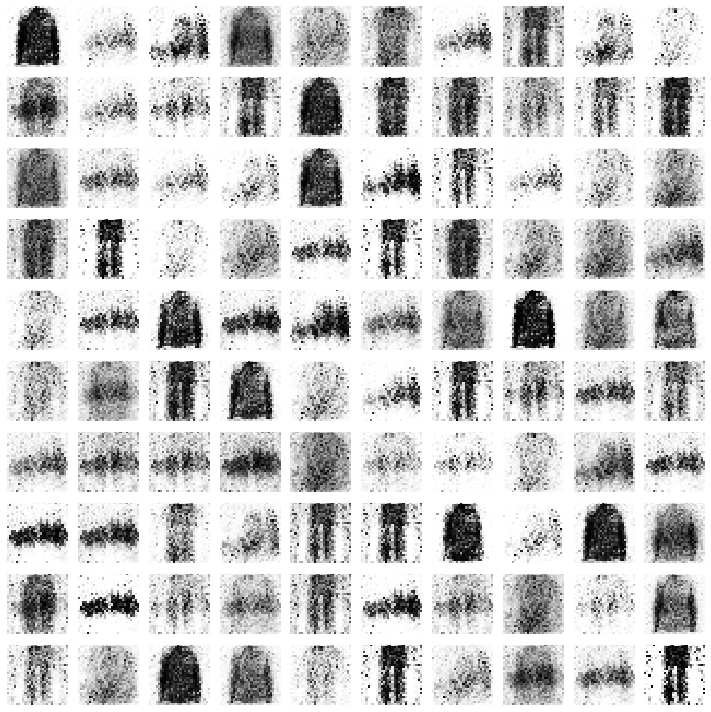

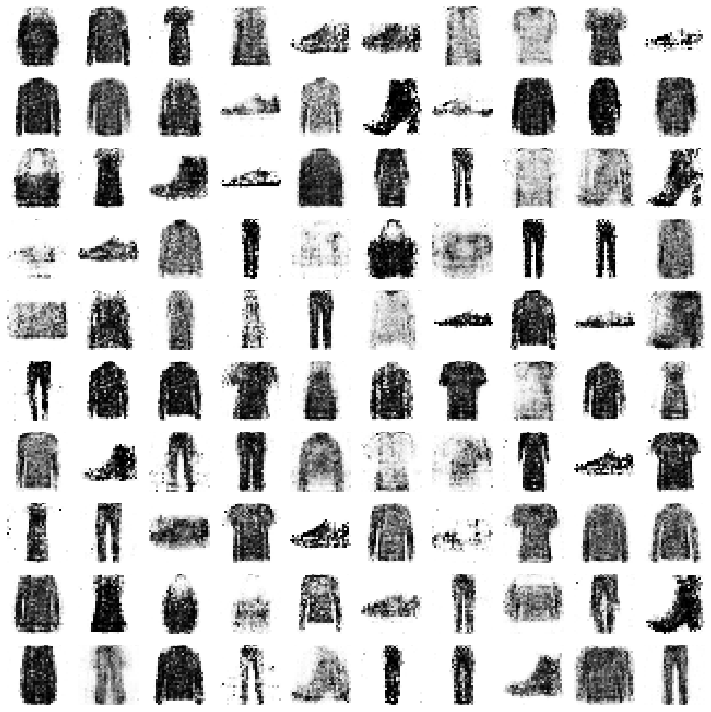

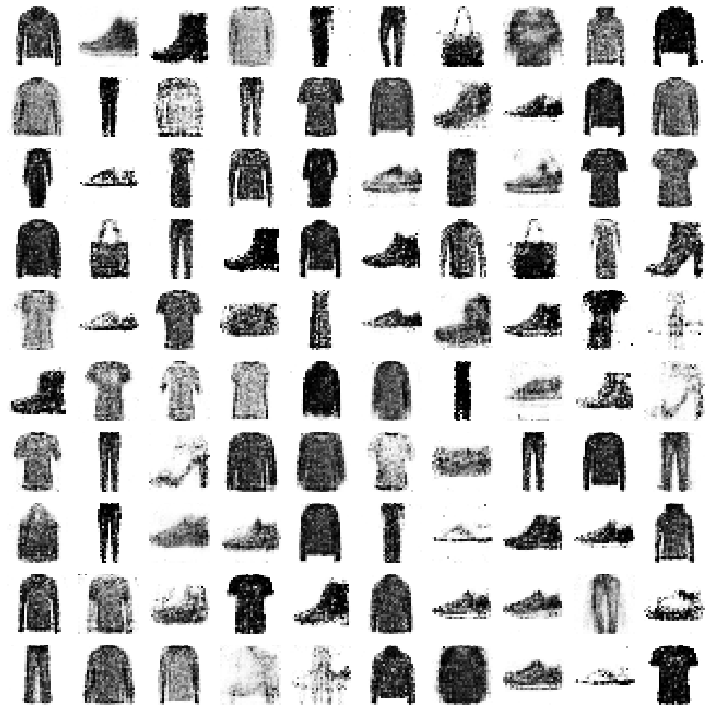

In [10]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] / batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(int(batch_count))):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

train(40, 128)  #0ri